In [5]:
!cat ../../../DRONES_ENV.sh

#!/bin/bash -l

#source this file before performing any obiwan production runs or obiwan analysis

#for determining whether this file is sourced
export DRONES_ACTIVATION=True

#DRONES current directory
export DRONES_DIR=/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/Drones

#some excecutable python packages: master-slave code
export PYTHONPATH=$DRONES_DIR/py:$PYTHONPATH

#general output directory for obiwan production run
export obiwan_out=/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/

#obiwan production run output directory, it comes with a production run name
export production_run_sgc=$obiwan_out/elg_200per_run/tractor/

#tractor data for dr3
export dr3_tractor_data=/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor



In [5]:
import os
import glob
from astropy.io import fits
dr3_tractor_data='/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor'
subset = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset'
elg_dat = subset+'/eBOSS_ELG_full_ALL_v4.dat.fits'

In [15]:
elg = fits.getdata(elg_dat)

In [16]:
elg.columns

ColDefs(
    name = 'RA'; format = 'D'; unit = 'degrees'
    name = 'DEC'; format = 'D'; unit = 'degrees'
    name = 'Z'; format = 'D'
    name = 'WEIGHT_SYSTOT'; format = 'D'
    name = 'WEIGHT_CP'; format = 'D'
    name = 'WEIGHT_NOZ'; format = 'D'
    name = 'NZ'; format = 'D'; unit = '(h/Mpc)^3'
    name = 'WEIGHT_FKP'; format = 'D'
    name = 'sector_TSR'; format = 'D'
    name = 'COMP_BOSS'; format = 'D'
    name = 'plate_MJD_SSR'; format = 'D'
    name = 'sector_SSR'; format = 'D'
    name = 'chunk'; format = '7A'
    name = 'plate'; format = 'J'
    name = 'tile'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'sector'; format = 'J'
    name = 'ELG_sector'; format = 'J'
    name = 'sector_area'; format = 'D'; unit = 'degrees^2'
    name = 'sector_ntiles'; format = 'I'
    name = 'sector_tiles'; format = '4I'
    name = 'INGROUP'; format = 'J'
    name = 'ELG_INGROUP'; format = 'J'
    name = 'MULTGROUP'; format = 'J'
    name = 'EBOSS_TARGET1'; format = 'K'
    name = '

In [4]:
tc = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr3/tractor/000/tractor-0001m002.fits')
tc.columns

ColDefs(
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'blob'; format = 'J'
    name = 'ninblob'; format = 'I'
    name = 'tycho2inblob'; format = 'L'
    name = 'type'; format = '4A'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'bx0'; format = 'E'
    name = 'by0'; format = 'E'
    name = 'left_blob'; format = 'L'
    name = 'out_of_bounds'; format = 'L'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'; unit = 'mag'
    name = 'cpu_source'; format = 'E'
    name = 'cpu_blob'; format = 'E'
    name = 'blob_width'; format = 'I'
    name = 'blob_height'; format = 'I'
    name = 'blob_npix'; format = 'J'
    name = 'blob_nimages'; format = 'I'


In [6]:
#DEEP2 z range check
fn_sim_match = 'sim_match_200per_0125_masked.fits'
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
sim_match = fits.getdata(topdir + fn_sim_match)
sim_match.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'nn_redshift'; format = 'D'
    name = 'sim_in'; format = 'L'
    name = 'sim_true'; format = 'L'
    name = 'VETOMASK'; format = 'B'
    name = 'MCHUNK'; format = 'B'
)

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0,'redshift')

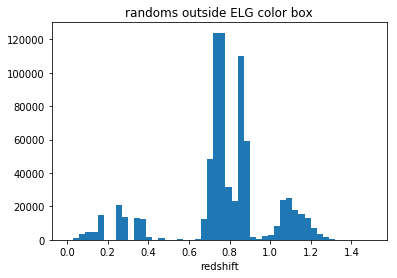

In [26]:
%pylab inline
deep2 = sim_match[~sim_match['sim_true']]
import matplotlib.pyplot as plt
s = plt.hist(deep2['nn_redshift'],bins = 50)
plt.title('randoms outside ELG color box')
plt.xlabel('redshift')

Text(0.5,0,'redshift')

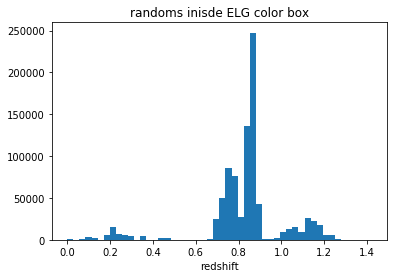

In [25]:
dr3 = sim_match[sim_match['sim_true']]
s = plt.hist(dr3['nn_redshift'],bins = 50)
plt.title('randoms inisde ELG color box')
plt.xlabel('redshift')

Text(0.5,0,'redshift')

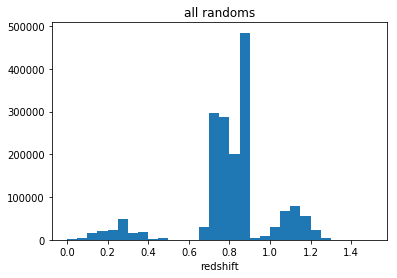

In [24]:
fn_sim = 'sim_200per_0125.fits'
sim= fits.getdata(topdir + fn_sim)
s = plt.hist(sim['nn_redshift'],bins=30)
plt.title('all randoms')
plt.xlabel('redshift')

In [16]:
sim.columns

ColDefs(
    name = 'redshift'; format = 'D'
    name = 'g'; format = 'D'
    name = 'r'; format = 'D'
    name = 'z'; format = 'D'
    name = 'nn_redshift'; format = 'D'
    name = 'n'; format = 'D'
    name = 'id_sample'; format = '32A'
    name = 'rhalf'; format = 'D'
    name = 'id'; format = 'J'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'ba'; format = 'D'
    name = 'pa'; format = 'D'
)

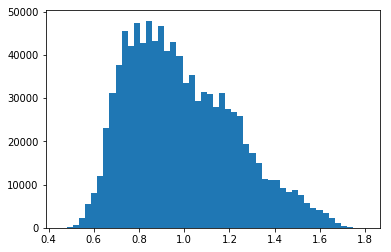

In [70]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/HPSS/randoms/elg_dr5/randoms_rank_184.fits')
s=plt.hist(dat['redshift'],bins=50)

Text(0.5,1,'NGC sim')

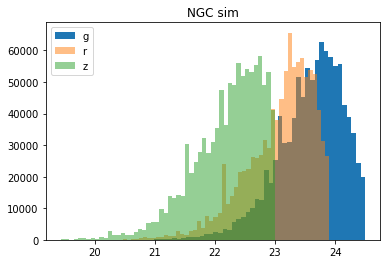

In [77]:
s=plt.hist(dat['g'],bins=50,label = 'g')
s=plt.hist(dat['r'],bins=50,alpha=0.5,label='r')
s=plt.hist(dat['z'],bins=50,alpha=0.5,label='z')
plt.legend()
plt.title('NGC sim')Ok.

In [29]:
dat.columns

ColDefs(
    name = 'id'; format = 'J'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'redshift'; format = '1D'
    name = 'id_5d10k_sample'; format = 'K'
    name = 'g'; format = 'D'
    name = 'r'; format = 'D'
    name = 'z'; format = 'D'
    name = 'rhalf'; format = 'D'
    name = 'n'; format = 'D'
    name = 'ba'; format = 'D'
    name = 'pa'; format = 'D'
)

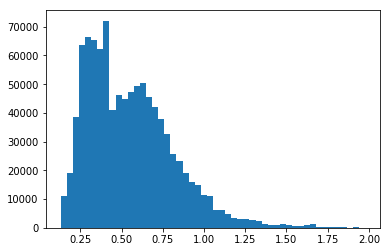

In [80]:
tt = plt.hist(dat['rhalf'],bins = 50)

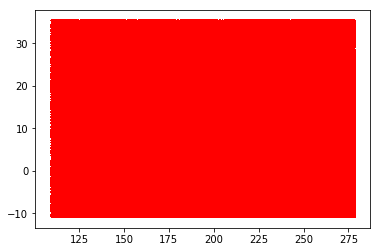

In [32]:
plt.plot(dat['ra'],dat['dec'],'r,')

(array([   6730.,  100905.,  224559.,  216635.,  162867.,  139946.,
          77522.,   46227.,   22235.,    2374.]),
 array([ 0.44610156,  0.58066081,  0.71522005,  0.8497793 ,  0.98433854,
         1.11889779,  1.25345704,  1.38801628,  1.52257553,  1.65713477,
         1.79169402]),
 <a list of 10 Patch objects>)

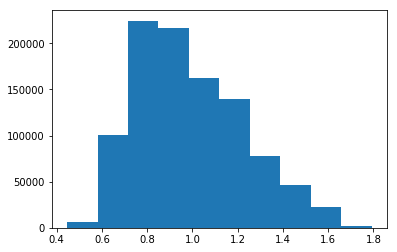

In [33]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/HPSS/randoms/elg_dr5/randoms_rank_234.fits')
plt.hist(dat['redshift'])

(array([   4027.,   89297.,  227513.,  225595.,  167842.,  143513.,
          75608.,   45914.,   19476.,    1215.]),
 array([ 0.42789989,  0.56662424,  0.70534858,  0.84407293,  0.98279728,
         1.12152163,  1.26024598,  1.39897033,  1.53769467,  1.67641902,
         1.81514337]),
 <a list of 10 Patch objects>)

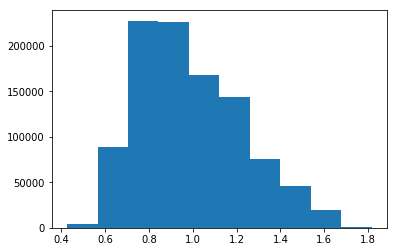

In [34]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/HPSS/randoms/elg_dr5/randoms_rank_334.fits')
plt.hist(dat['redshift'])

In [47]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_dr3deep2_EXP.csv'
fn2 = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_dr3deep2_DEV.csv'

In [46]:
import pandas
df = pandas.read_csv(fn)
print(df)

       tractor_id          g          r          z  fwhm_or_rhalf  redshift
0     519697-1372  22.114819  21.136913  20.024069       1.028337  0.788818
1     519697-1270  22.967899  22.145103  21.384106       0.500000  0.771117
2     519697-1125  22.971628  22.445499  21.775711       1.637607  0.776904
3     519697-1387  22.428120  21.772739  20.632568       1.037174  0.986220
4     519696-1282  22.565952  22.024824  21.285723       0.845983  0.877277
5     519696-1375  22.874052  22.534157  21.843233       0.500000  0.131756
6     519695-1200  22.925655  21.977459  21.169605       0.500000  1.205241
7     519695-1173  21.782009  21.212311  20.413994       0.989609  0.052857
8      519695-982  22.057695  21.536018  20.725662       1.708711  0.855131
9     519695-1009  22.087196  21.123802  19.987047       1.055671  1.025431
10    519695-1152  23.021717  22.727531  22.195967       1.605685  1.142323
11    519695-1083  22.601192  22.168739  21.133825       0.971312  0.925829
12    519694

In [48]:
df2 = pandas.read_csv(fn2)
print(df2)

     tractor_id          g          r          z  fwhm_or_rhalf  redshift
0   519697-1323  22.816387  21.775593  20.490623       0.856749  0.767515
1   519696-2257  22.402441  22.169109  21.508963       1.490352  0.863516
2   520880-3941  22.265865  21.960155  20.389816       2.127113  0.997486
3    522059-373  22.455421  22.065363  21.344959       1.439635  0.849804
4   519695-2885  21.944378  21.318527  20.671013       4.769077  0.720690
5   519699-1824  22.573025  21.676638  20.707722       0.600296  0.799048
6   519699-2378  22.615202  21.788233  20.551670       2.805822  0.831243
7   519698-2420  21.689501  21.264957  20.417313       1.079081  0.845055
8   519697-2207  22.044449  21.143810  20.091244       3.678913  0.832011
9   519697-2431  22.917168  21.997967  20.597391       0.706778  0.859505
10  519699-3143  22.342892  21.422232  20.052822       1.634152  0.965955
11  519699-3518  21.980320  21.628651  20.592667       2.569872  0.474297
12  519698-3196  22.455408  21.405983 

In [49]:
fn3= '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_tsspectra_EXP.csv'

In [50]:
df3 = pandas.read_csv(fn3)
print(df3)

              sdss_id          g          r          z  fwhm_or_rhalf  \
0      9220-57932-786  22.472942  21.804121  21.039890       0.720523   
1      9223-57927-341  22.624390  21.915033  21.157459       0.917767   
2      9220-57932-824  22.314552  21.691116  20.634329       1.269612   
3        9221-57938-6  22.746529  22.299320  21.597607       0.500000   
4      9223-57927-304  22.508411  22.075359  21.332052       0.742052   
5      9223-57927-344  22.665001  22.235453  21.241177       0.672558   
6      9220-57932-781  22.580502  21.912977  21.042917       0.500000   
7      9223-57927-306  22.666952  21.850067  20.792561       0.886560   
8      9220-57932-785  22.743977  21.971779  20.799137       0.500000   
9      9220-57932-827  22.582096  22.101049  21.193792       0.883500   
10     9223-57927-347  22.309811  21.618965  20.479433       1.025819   
11     9220-57932-823  22.817371  22.235205  21.014790       0.606900   
12     9220-57932-821  22.381687  21.626266  20.476

In [67]:
fn4= '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/etc/eboss_elg_tsspectra_DEV.csv'
df4 = pandas.read_csv(fn4)
print(df4)

             sdss_id          g          r          z  fwhm_or_rhalf  redshift
0       9221-57938-3  21.962345  21.136351  20.198647       0.537789  1.279219
1     9223-57927-312  22.206196  21.791307  21.070374       0.485873  1.016277
2      9221-57938-10  22.767540  22.098808  21.062010       0.777910  0.930815
3     9223-57927-696  22.556919  21.808870  20.954466       0.923958  0.788284
4     9223-57927-700  22.783697  22.233940  21.282673       2.122953  1.206559
5     9223-57927-697  21.852514  21.189585  20.191393       0.438501  0.711247
6     9223-57927-667  21.910164  21.458483  20.707197       0.291582  0.779609
7     9223-57927-291  21.857162  21.113811  20.068836       0.420489  0.774072
8     9220-57932-877  21.888655  21.124575  20.252380       1.837375  0.675670
9     9220-57932-847  22.434376  21.714781  20.707581       0.273800  0.782070
10    9220-57932-853  22.089878  21.434736  20.556664       2.681467  1.016514
11    9220-57932-198  22.629622  21.873465  20.70108

Text(0.5,0,'redshift')

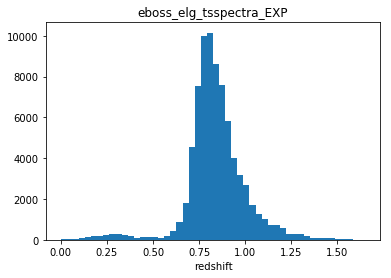

In [62]:
tt = plt.hist(df3['redshift'],bins=50)
plt.title('eboss_elg_tsspectra_EXP')
plt.xlabel('redshift')

Text(0.5,0,'redshift')

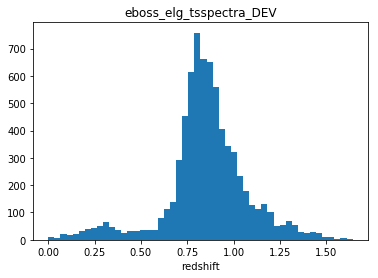

In [68]:
tt = plt.hist(df4['redshift'],bins=50)
plt.title('eboss_elg_tsspectra_DEV')
plt.xlabel('redshift')

Text(0.5,0,'redshift')

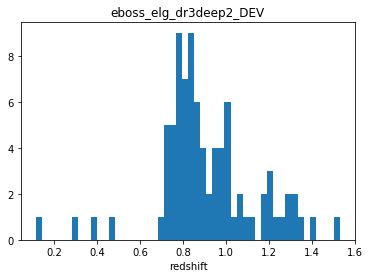

In [65]:
tt = plt.hist(df2['redshift'],bins=50)
plt.title('eboss_elg_dr3deep2_DEV')
plt.xlabel('redshift')

Text(0.5,0,'redshift')

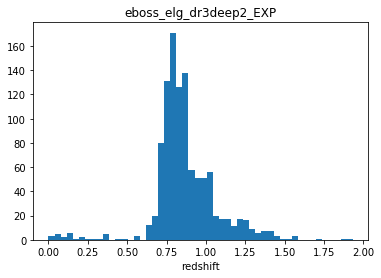

In [66]:
tt = plt.hist(df['redshift'],bins=50)
plt.title('eboss_elg_dr3deep2_EXP')
plt.xlabel('redshift')

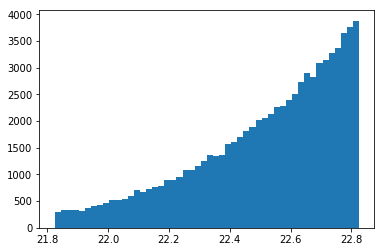

In [81]:
tt = plt.hist(df3['g'],bins=50)

In [83]:
def select_ELG_sim(sim_dat, region = 'sgc'):
    g = sim_dat['g']
    r_mag = sim_dat['r']
    z_mag = sim_dat['z']
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    if region == 'sgc':
         return color_sgc
    else:
         return color_ngc

In [84]:
dat = fits.getdata('/global/cscratch1/sd/huikong/obiwan_Aug/HPSS/randoms/elg_dr5/randoms_rank_234.fits')
sel = select_ELG_sim(dat,region='ngc')

In [85]:
uuu = dat[sel]

Text(0.5,0,'redshift')

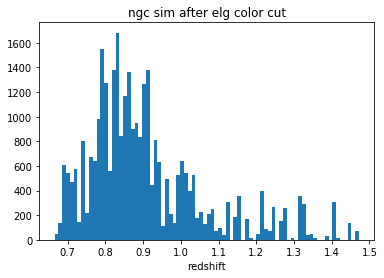

In [102]:
s=plt.hist(uuu['redshift'],bins = 80)
plt.title('ngc sim after elg color cut')
plt.xlabel('redshift')

In [101]:
len(uuu),len(dat),len(dat) - len(uuu)

(31288, 1000000, 968712)

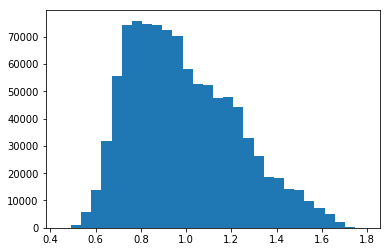

In [90]:
s=plt.hist(dat['redshift'],bins = 30)

In [97]:
sssl = select_ELG_sim(df3)

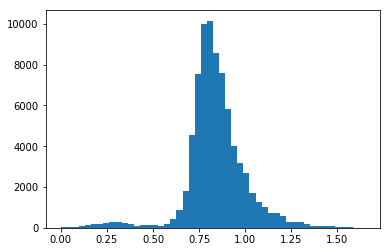

In [98]:
sss = df3[sssl]
ggg = plt.hist(sss['redshift'],bins = 50)

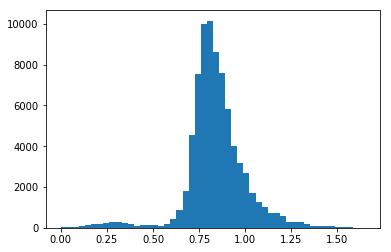

In [96]:
ggg = plt.hist(df3['redshift'],bins = 50)

In [99]:
sssl

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
77337    True
77338    True
77339    True
77340    True
77341    True
77342    True
77343    True
77344    True
77345    True
77346    True
77347    True
77348    True
77349    True
77350    True
77351    True
77352    True
77353    True
77354    True
77355    True
77356    True
77357    True
77358    True
77359    True
77360    True
77361    True
77362    True
77363    True
77364    True
77365    True
77366    True
Length: 77367, dtype: bool

In [108]:
sssl = select_ELG_sim(df4)

In [109]:
sssl

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
7199    True
7200    True
7201    True
7202    True
7203    True
7204    True
7205    True
7206    True
7207    True
7208    True
7209    True
7210    True
7211    True
7212    True
7213    True
7214    True
7215    True
7216    True
7217    True
7218    True
7219    True
7220    True
7221    True
7222    True
7223    True
7224    True
7225    True
7226    True
7227    True
7228    True
Length: 7229, dtype: bool

In [17]:
ss = '/global/cscratch1/sd/huikong/obiwan_Aug/HPSS/tractor/000/0001m030/rs0/tractor-0001m030.fits'

In [19]:
dat = fits.getdata(ss)
dat.columns

ColDefs(
    name = 'release'; format = 'I'
    name = 'brickid'; format = 'J'
    name = 'brickname'; format = '8A'
    name = 'objid'; format = 'J'
    name = 'brick_primary'; format = 'L'
    name = 'type'; format = '4A'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'ra_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'dec_ivar'; format = 'E'; unit = '1/deg^2'
    name = 'bx'; format = 'E'
    name = 'by'; format = 'E'
    name = 'dchisq'; format = '5E'
    name = 'ebv'; format = 'E'; unit = 'mag'
    name = 'mjd_min'; format = 'D'
    name = 'mjd_max'; format = 'D'
    name = 'flux_u'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_g'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_r'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_i'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_z'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_Y'; format = 'E'; unit = 'nanomaggy'
    name = 'flux_ivar_u'; format = 'E'; unit =

In [21]:
ss = '/global/cscratch1/sd/huikong/obiwan_Aug/HPSS/obiwan/000/0001m030/rs0/simcat-elg-0001m030.fits'
dat = fits.getdata(ss)
dat.columns

ColDefs(
    name = 'id'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'gflux'; format = 'D'
    name = 'mw_transmission_g'; format = 'E'
    name = 'rflux'; format = 'D'
    name = 'mw_transmission_r'; format = 'E'
    name = 'zflux'; format = 'D'
    name = 'mw_transmission_z'; format = 'E'
    name = 'n'; format = 'D'
    name = 'rhalf'; format = 'D'
    name = 'e1'; format = 'D'
    name = 'e2'; format = 'D'
)

In [22]:
fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out//subset/elg_dr3_match.fits'

In [24]:
dat = fits.getdata(fn)
dat.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'fracdev'; format = 'E'
    name = 'shapeexp_e1'; format = 'E'
    name = 'shapeexp_e2'; format = 'E'
    name = 'shapedev_e1'; format = 'E'
    name = 'shapedev_e2'; format = 'E'
    name = 'sim_id'; format = 'K'
    name = 'sim_gflux'; format = 'D'
    name = 'sim_rflux'; format = 'D'
    name = 'sim_zflux'; format = 'D'
    name = 'sim_mw_transmission_g'; format = 'E'
    name = 'sim_mw_transmission_r'; format = 'E'
    name = 'sim_mw_transmission_z'; format = 'E'
    name = 'sim_rhalf'; format = 'D'
    name = 'sim_n'; format = 'D'
    name = 'sim_e1'; format = 'D'
    name = 'sim_e2'; format = 'D'
)

Populating the interactive namespace from numpy and matplotlib


(array([   508.,  20557.,  70039.,  58421.,  35078.,  21322.,  13213.,
          6359.,   1231.,    285.]),
 array([ 0.39146962,  0.56088484,  0.73030005,  0.89971527,  1.06913048,
         1.23854569,  1.40796091,  1.57737612,  1.74679134,  1.91620655,
         2.08562177]),
 <a list of 10 Patch objects>)

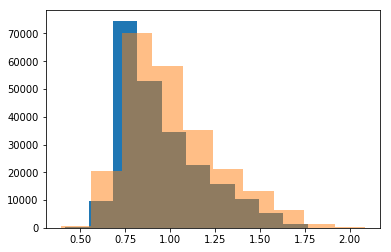

In [27]:
%pylab inline
import matplotlib.pyplot as plt
plt.hist(dat['flux_g'])
plt.hist(dat['sim_gflux'],alpha=0.5)

In [29]:
g     = 22.5 - 2.5 * np.log10(dat['flux_g'] / dat['mw_transmission_g'])
r_mag = 22.5 - 2.5 * np.log10(dat['flux_r'] / dat['mw_transmission_r'])
z_mag = 22.5 - 2.5 * np.log10(dat['flux_z'] / dat['mw_transmission_z'])

In [30]:
g_sim = 22.5 - 2.5 * np.log10(dat['sim_gflux'] / dat['sim_mw_transmission_g'])
r_sim = 22.5 - 2.5 * np.log10(dat['sim_rflux'] / dat['sim_mw_transmission_r'])
z_sim = 22.5 - 2.5 * np.log10(dat['sim_zflux'] / dat['sim_mw_transmission_z'])

(array([  1387.,   6802.,  16225.,  23736.,  31444.,  41301.,  49871.,
         38931.,  14927.,   2389.]),
 array([ 21.63539505,  21.77431259,  21.91323013,  22.05214767,
         22.19106522,  22.32998276,  22.4689003 ,  22.60781784,
         22.74673538,  22.88565292,  23.02457047]),
 <a list of 10 Patch objects>)

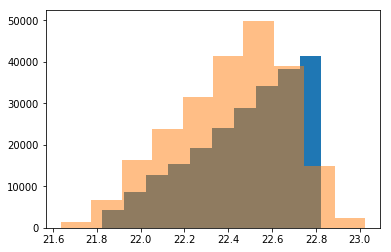

In [32]:
plt.hist(g)
plt.hist(g_sim,alpha=0.5)

In [ ]:
''